In [5]:
# Lets import some common modeules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
#Lets import some modules for reading stock data from yahoo

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [77]:
yf.pdr_override()

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

current = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
end = datetime(end.year, end.month, end.day)
start

datetime.datetime(2018, 3, 8, 0, 0)

In [78]:
end

datetime.datetime(2023, 3, 8, 0, 0)

In [79]:
for i in tech_list:
    i = yf.download(i, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [80]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for a,b in zip(company_list, company_name):
    a['company_name'] = b

In [81]:
AMZN

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-03-08,77.500000,77.744003,77.262497,77.593002,77.593002,77252000,AMAZON
2018-03-09,78.175003,78.946999,77.954002,78.944504,78.944504,90686000,AMAZON
2018-03-12,79.629997,80.266502,79.334999,79.919502,79.919502,103484000,AMAZON
2018-03-13,80.797997,80.876999,78.900497,79.408997,79.408997,130638000,AMAZON
2018-03-14,79.849998,80.321999,79.544502,79.550003,79.550003,85188000,AMAZON
...,...,...,...,...,...,...,...
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500,AMAZON
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400,AMAZON
2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55695300,AMAZON


In [82]:
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-22,95.099998,97.010002,94.800003,95.790001,95.790001,59534100,AMAZON
2023-02-23,96.120003,96.430000,93.669998,95.820000,95.820000,48467000,AMAZON
2023-02-24,93.529999,94.139999,92.320000,93.500000,93.500000,57053800,AMAZON
2023-02-27,94.279999,94.779999,93.139999,93.760002,93.760002,47470300,AMAZON
2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300,AMAZON
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500,AMAZON
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400,AMAZON
2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55695300,AMAZON
2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52112400,AMAZON


In [83]:
df.shape

(5032, 7)

In [84]:
1258*4

5032

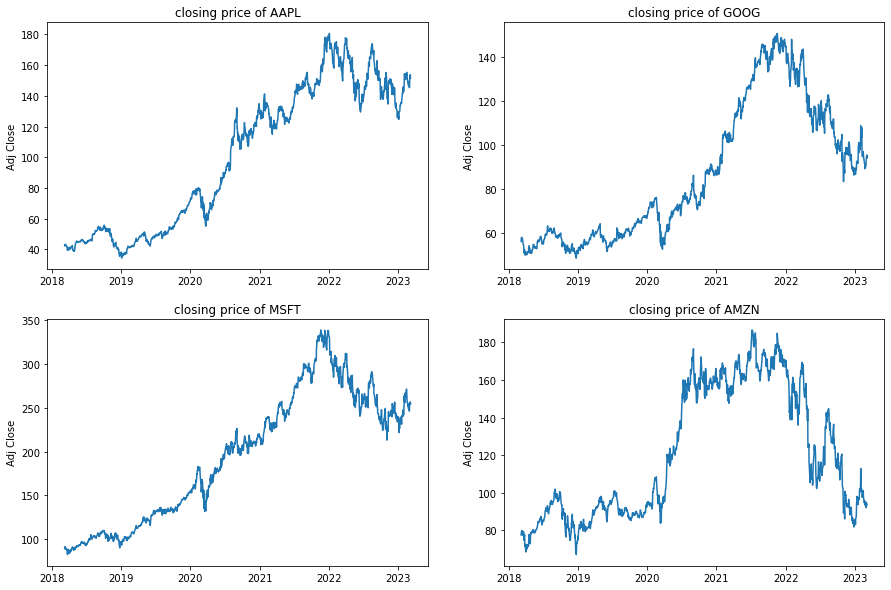

In [103]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['Adj Close'])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title('closing price of '+str(tech_list[i-1]))
    

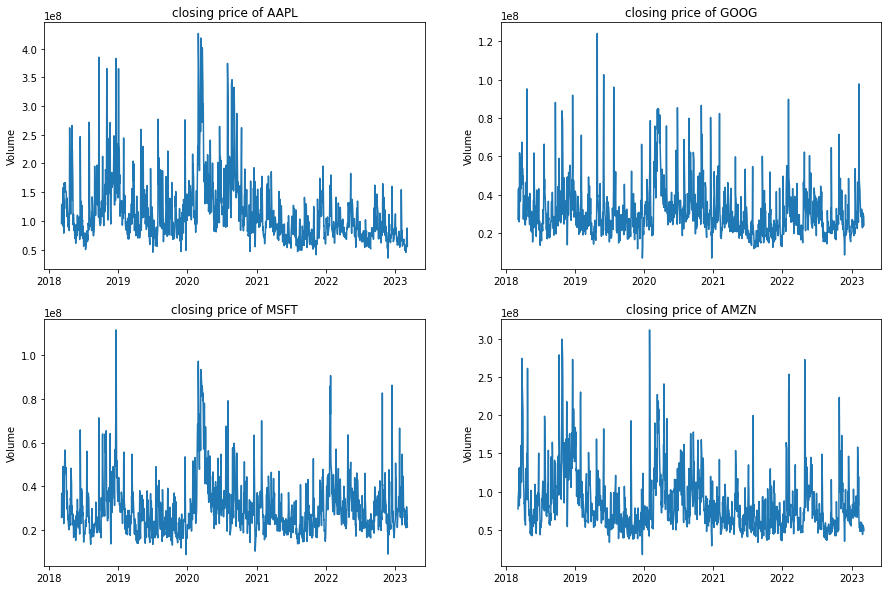

In [104]:
# Let's see a historical view of the stock volume

plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['Volume'])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title('closing price of '+str(tech_list[i-1]))
    

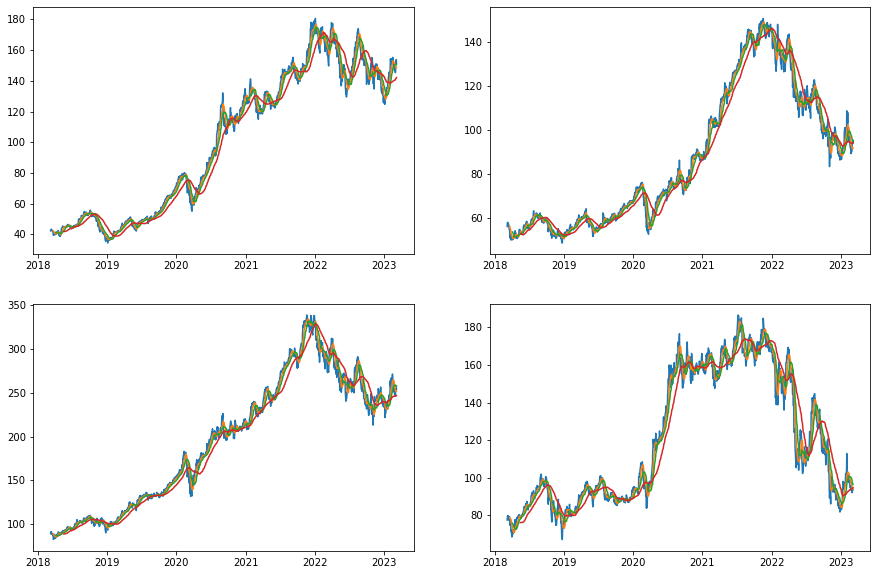

In [121]:
moving_average = [10, 20, 50]

for i in moving_average:
    for company in company_list:
        column_name = 'Moving_Avg('+str(i)+')'
        company[column_name] = company['Adj Close'].rolling(i).mean()
        
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    plt.plot(company[['Adj Close', 'Moving_Avg(10)', 'Moving_Avg(20)', 'Moving_Avg(50)' ]])
    plt.xlabel('Moving Average')
    plt.title('')


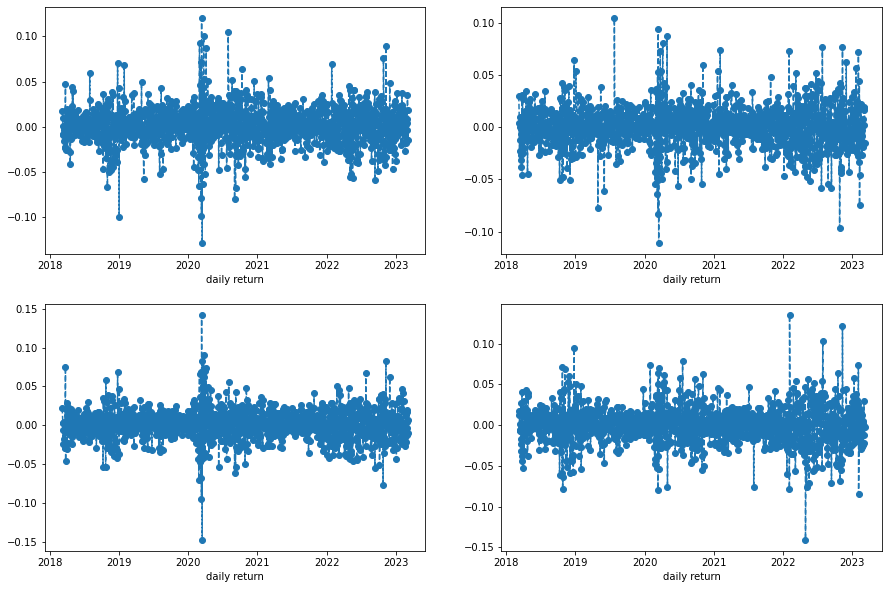

In [130]:
for i in company_list:
    i['daily return'] = i['Adj Close'].pct_change()
    
        
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    plt.plot(company[['daily return']], linestyle = '--', marker = 'o')
    plt.xlabel('daily return')
    plt.title('')

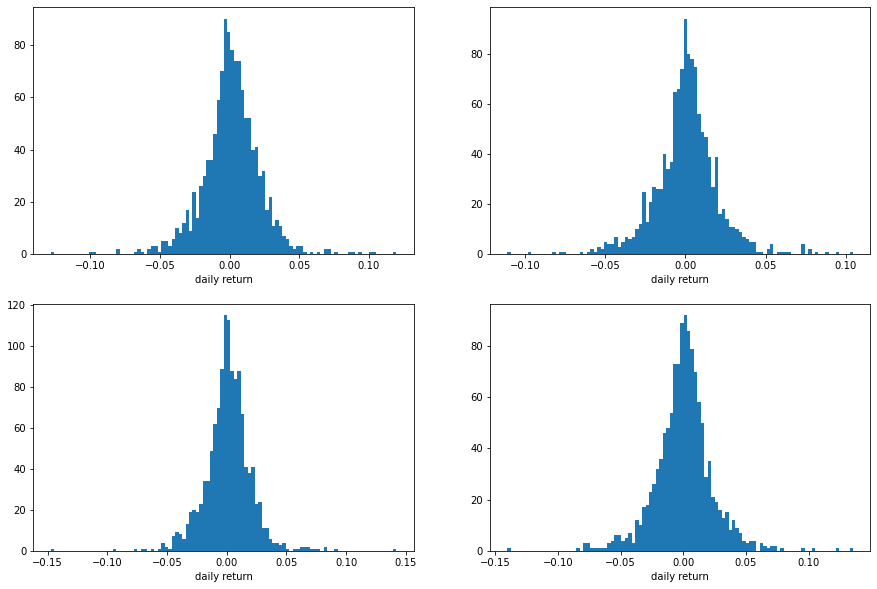

In [133]:
plt.figure(figsize=(15, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    plt.hist(company[['daily return']], bins=100)
    plt.xlabel('daily return')
    plt.title('')

In [134]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name,Moving_Avg(10),Moving_Avg(20),Moving_Avg(50),daily return
Date,,,,,,,,,,,
2018-03-08,43.869999,44.279999,43.767502,44.235001,42.170151,95096400,APPLE,NaN,NaN,NaN,NaN
2018-03-09,44.490002,45.000000,44.347500,44.994999,42.894688,128740800,APPLE,NaN,NaN,NaN,0.017181
2018-03-12,45.072498,45.597500,45.052502,45.430000,43.309380,128828400,APPLE,NaN,NaN,NaN,0.009668
2018-03-13,45.647499,45.875000,44.810001,44.992500,42.892288,126774000,APPLE,NaN,NaN,NaN,-0.009631
2018-03-14,45.080002,45.130001,44.452499,44.610001,42.527660,117473600,APPLE,NaN,NaN,NaN,-0.008501
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,APPLE,149.573001,150.604708,140.717211,-0.014246
2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52238100,APPLE,148.631001,150.639794,140.949312,0.004129
2023-03-03,148.039993,151.110001,147.330002,151.029999,151.029999,70668500,APPLE,148.363000,150.661790,141.326548,0.035090


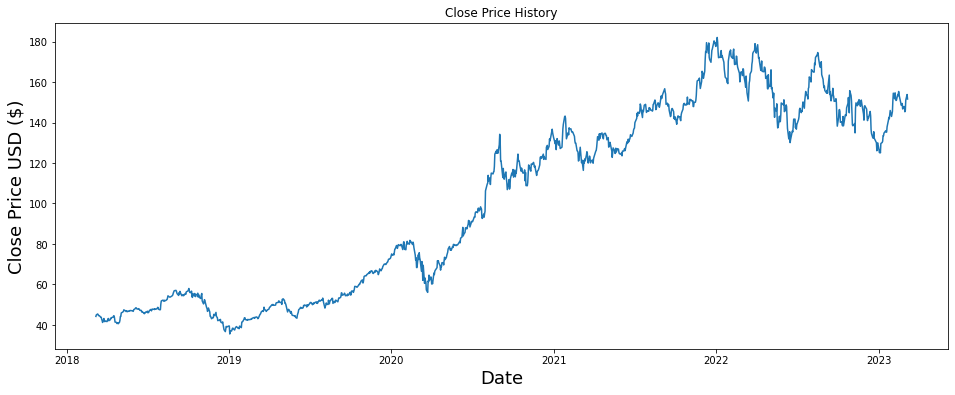

In [137]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [140]:
# Create a new dataframe with only the 'Close column 
data = AAPL.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values


In [142]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05931553],
       [0.06450456],
       [0.06747461],
       ...,
       [0.7884783 ],
       [0.80759584],
       [0.79237013]])

In [146]:
training_data_len = int(len(scaled_data)*0.90)

In [147]:
training_data_len

1132

In [148]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        


In [149]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)


In [152]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1072, 60, 1)

In [153]:
x_train

array([[[0.05931553],
        [0.06450456],
        [0.06747461],
        ...,
        [0.07734062],
        [0.07626525],
        [0.08201759]],

       [[0.06450456],
        [0.06747461],
        [0.0644875 ],
        ...,
        [0.07626525],
        [0.08201759],
        [0.08473159]],

       [[0.06747461],
        [0.0644875 ],
        [0.06187591],
        ...,
        [0.08201759],
        [0.08473159],
        [0.08725783]],

       ...,

       [[0.75509092],
        [0.77263812],
        [0.76751736],
        ...,
        [0.87443885],
        [0.8591449 ],
        [0.8422805 ]],

       [[0.77263812],
        [0.76751736],
        [0.73119401],
        ...,
        [0.8591449 ],
        [0.8422805 ],
        [0.8307417 ]],

       [[0.76751736],
        [0.73119401],
        [0.6935735 ],
        ...,
        [0.8422805 ],
        [0.8307417 ],
        [0.83579422]]])

In [177]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
regressor = Sequential()

regressor.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(128, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(128, return_sequences=False))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
regressor.fit(x_train, y_train, batch_size=50, epochs=20)

Epoch 1/20
22/22 [==============================] - 19s 346ms/step - loss: 0.0417
Epoch 2/20
22/22 [==============================] - 7s 331ms/step - loss: 0.0041
Epoch 3/20
22/22 [==============================] - 7s 328ms/step - loss: 0.0034
Epoch 4/20
22/22 [==============================] - 8s 346ms/step - loss: 0.0024
Epoch 5/20
22/22 [==============================] - 8s 349ms/step - loss: 0.0027
Epoch 6/20
22/22 [==============================] - 7s 332ms/step - loss: 0.0026
Epoch 7/20
22/22 [==============================] - 7s 320ms/step - loss: 0.0022
Epoch 8/20
22/22 [==============================] - 8s 346ms/step - loss: 0.0027
Epoch 9/20
22/22 [==============================] - 8s 350ms/step - loss: 0.0024
Epoch 10/20
22/22 [==============================] - 8s 348ms/step - loss: 0.0020
Epoch 11/20
22/22 [==============================] - 7s 342ms/step - loss: 0.0022
Epoch 12/20
22/22 [==============================] - 8s 343ms/step - loss: 0.0022
Epoch 13/20
22/22 [=====

In [178]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



In [179]:
# Get the models predicted price values 
predictions = regressor.predict(x_test)



4/4 [==============================] - 3s 85ms/step


In [180]:
predictions = scaler.inverse_transform(predictions)

In [181]:
y_train.shape

(1072,)

In [182]:
predictions.shape

(126, 1)

In [183]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.1917461689905435

C:\Users\ASUS\AppData\Local\Temp/ipykernel_16828/3685104888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


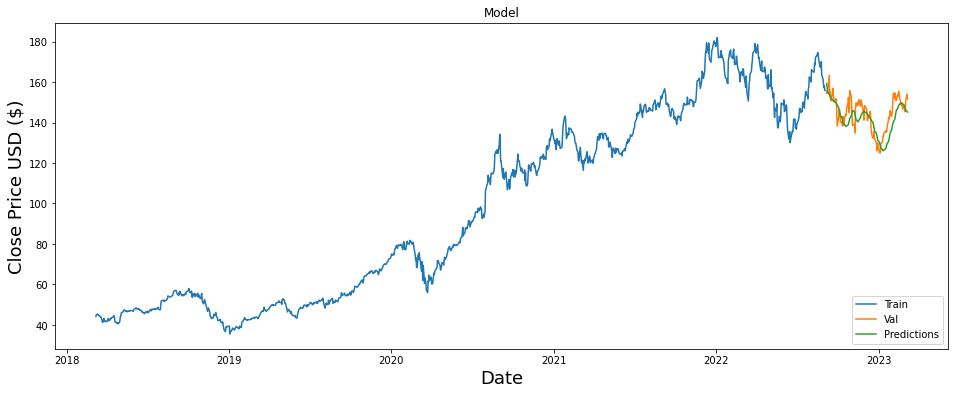

In [184]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()